In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
TYPES = ["gp"]
palette = sns.color_palette("pastel", len(TYPES))
color_map = dict(zip(TYPES, palette))

# Zadanie 1

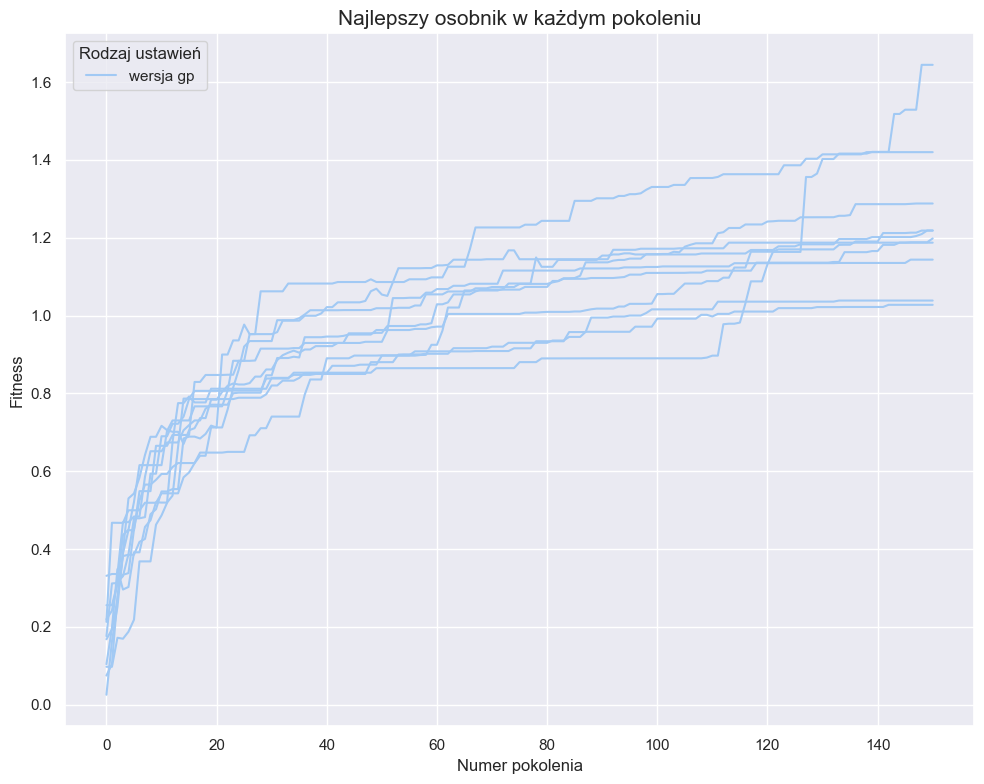

In [4]:
plt.figure(figsize=(10, 8))

for _type in TYPES:
    for i in range(1, 11):
        df = pd.read_csv(f"../framspy/lab6/{_type}/Deap/{i}.csv", usecols=['gen', 'max'])
        sns.lineplot(df, x='gen', y='max', color=color_map[_type], label=f"wersja {_type}" if i == 1 else "")

plt.title("Najlepszy osobnik w każdym pokoleniu", fontsize=15)
plt.ylabel("Fitness")
plt.xlabel("Numer pokolenia")

plt.legend(title="Rodzaj ustawień")
plt.tight_layout()
plt.savefig('1-przebiegi.png')
plt.show()

# Zadanie 2

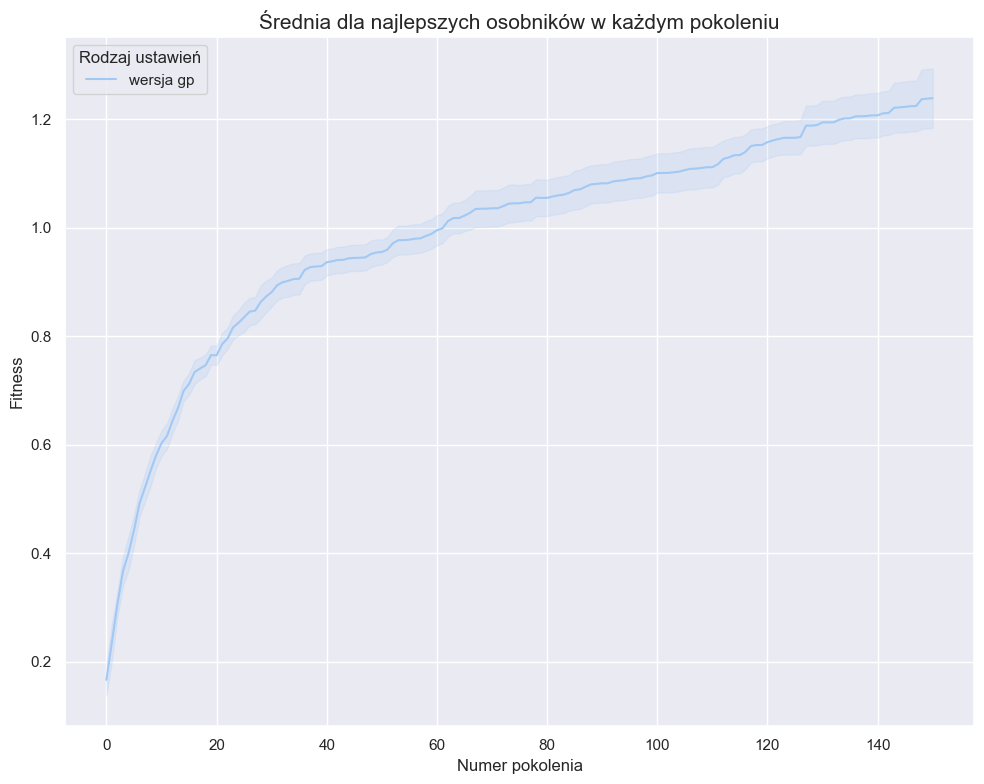

In [5]:
plt.figure(figsize=(10, 8))

for _type in TYPES:
    df = pd.DataFrame()
    for i in range(1, 11):
        df_temp = pd.read_csv(f"../framspy/lab6/{_type}/Deap/{i}.csv", usecols=['gen', 'max'])
        df = pd.concat([df, df_temp])
    sns.lineplot(df, x='gen', y='max', color=color_map[_type], label=f"wersja {_type}", errorbar=("sd", 0.3))

plt.title("Średnia dla najlepszych osobników w każdym pokoleniu", fontsize=15)
plt.ylabel("Fitness")
plt.xlabel("Numer pokolenia")

plt.legend(title="Rodzaj ustawień")
plt.tight_layout()
plt.savefig('2-przebiegi-agregacja.png')
plt.show()

# Zadanie 3

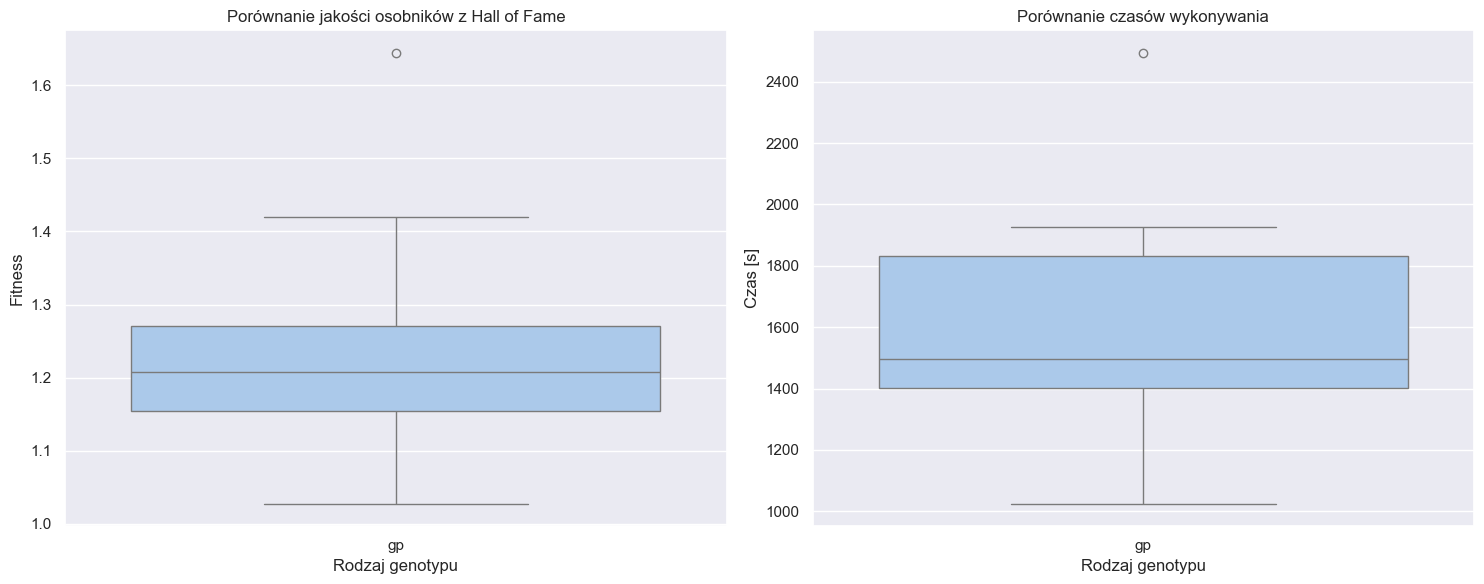

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes = axes.flatten()

# FITNESS
data = {_type: [] for _type in TYPES}
for _type in TYPES:
    for i in range(1, 11):
        with open(f"../framspy/lab6/{_type}/HoF/{i}.gen") as file:
            for line in file:
                if line.startswith("vertpos"):
                    value = float(line.split(':')[1])
                    data[_type].append(value)
        
df = pd.DataFrame(data)
sns.boxplot(df, palette='pastel', ax=axes[0])
axes[0].set_title("Porównanie jakości osobników z Hall of Fame")
axes[0].set_xlabel("Rodzaj genotypu")
axes[0].set_ylabel("Fitness")

data = {_type: [] for _type in TYPES}
for _type in TYPES:
    df = pd.read_csv(f"../framspy/lab6/{_type}/times.txt")
    data[_type] = df['time'].to_list()
    
df = pd.DataFrame(data)
sns.boxplot(df, palette='pastel', ax=axes[1])
axes[1].set_title("Porównanie czasów wykonywania")
axes[1].set_xlabel("Rodzaj genotypu")
axes[1].set_ylabel("Czas [s]")

plt.tight_layout()
plt.savefig('3-boxplot.png')
plt.show()